# Transformaciones Básicas de una figura 2D

## Crear un cuadrado 2D

Pasos rápidos:
1. Definir los vértices del cuadrado en coordenadas (x, y).
2. Dibujar líneas entre los vértices y rellenar con matplotlib (plt.plot y plt.fill).
3. Asegurar aspect ratio igual para que el cuadrado no se deforme (ax.set_aspect('equal')).

In [ ]:
# Comprobar e instalar matplotlib
import sys
import subprocess

try:
    import matplotlib
    print('matplotlib ya está instalado, versión:', matplotlib.__version__)
except Exception:
    print('Instalando matplotlib...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])
    import matplotlib
    print('Instalado matplotlib, versión:', matplotlib.__version__)

# Nota: en entornos como Jupyter se puede usar también '%pip install matplotlib' en una celda.

matplotlib ya está instalado, versión: 3.10.6


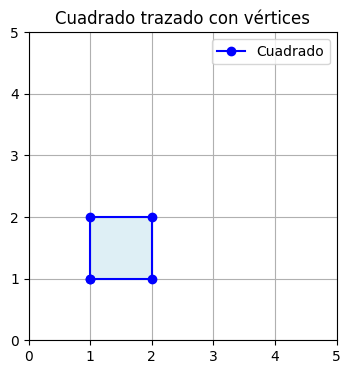

In [23]:
# Importar y dibujar un cuadrado mediante vértices y líneas
import matplotlib.pyplot as plt

# Definir vértices del cuadrado (cerrando la figura repitiendo el primer punto)
coords = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]
xs = [p[0] for p in coords]
ys = [p[1] for p in coords]

plt.figure(figsize=(4,4))
plt.plot(xs, ys, '-o', color='blue', label='Cuadrado')  # líneas y marcadores en vértices
plt.fill(xs, ys, color='lightblue', alpha=0.4)          # relleno semitransparente
plt.gca().set_aspect('equal', adjustable='box')         # mantener proporción
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.title('Cuadrado trazado con vértices')
plt.legend()
plt.show()

# Aplicar traslación, rotación y escala usando matrices de transformación.

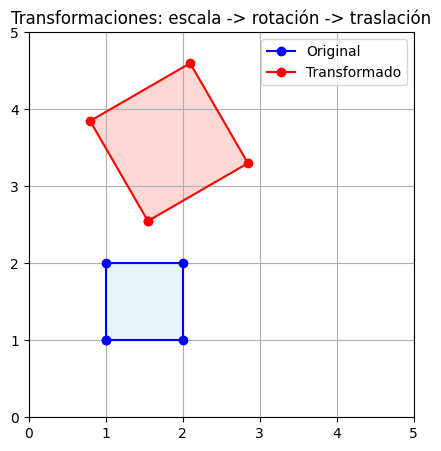

M_scale =
 [[1.5 0.  0. ]
 [0.  1.5 0. ]
 [0.  0.  1. ]]
M_rot =
 [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
M_trans =
 [[1.  0.  1. ]
 [0.  1.  0.5]
 [0.  0.  1. ]]
M (compuesta) =
 [[ 1.29903811 -0.75        1.        ]
 [ 0.75        1.29903811  0.5       ]
 [ 0.          0.          1.        ]]


In [24]:
# Aplicar matrices de transformación (traslación, rotación, escala) usando coordenadas homogéneas
import numpy as np
import matplotlib.pyplot as plt

# Puntos originales (homogéneas): usar los vértices actuales sin repetir el punto final para la transformación
pts2d = np.array([[1,1],[1,2],[2,2],[2,1]]).T  # shape (2, N)
ones = np.ones((1, pts2d.shape[1]))
pts = np.vstack([pts2d, ones])                # shape (3, N)

def T(tx, ty):
    return np.array([[1, 0, tx],[0, 1, ty],[0, 0, 1]])

def R(deg):
    th = np.deg2rad(deg)
    c, s = np.cos(th), np.sin(th)
    return np.array([[c, -s, 0],[s, c, 0],[0, 0, 1]])

def S(sx, sy):
    return np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1]])

# Ejemplo: escalar 1.5, rotar 30 grados, trasladar (1, 0.5)
M_scale = S(1.5, 1.5)
M_rot = R(30)
M_trans = T(1.0, 0.5)

# Composición: primero escalar, luego rotar, luego trasladar (aplicar S -> R -> T):
M = M_trans @ M_rot @ M_scale

# Aplicar transformación
pts_t = M @ pts

# Convertir de vuelta a 2D para dibujar (cerrar la figura repitiendo el primer punto)
orig_x = np.append(pts[0,:], pts[0,0])
orig_y = np.append(pts[1,:], pts[1,0])
tr_x = np.append(pts_t[0,:], pts_t[0,0])
tr_y = np.append(pts_t[1,:], pts_t[1,0])

plt.figure(figsize=(5,5))
plt.plot(orig_x, orig_y, '-o', color='blue', label='Original')
plt.fill(orig_x, orig_y, color='lightblue', alpha=0.3)
plt.plot(tr_x, tr_y, '-o', color='red', label='Transformado')
plt.fill(tr_x, tr_y, color='salmon', alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.title('Transformaciones: escala -> rotación -> traslación')
plt.legend()
plt.show()

# Mostrar matrices (opcional)
print('M_scale =\n', M_scale)
print('M_rot =\n', M_rot)
print('M_trans =\n', M_trans)
print('M (compuesta) =\n', M)

## Generar la animación 

En este paso, se aplican las transformaciones al cuadrado y se genera una animación que muestra cómo el cuadrado se traslada, rota y escala en el espacio 2D. Se utiliza la función `FuncAnimation` de Matplotlib para crear la animación, actualizando la posición y forma del cuadrado en cada cuadro de la animación.

C:\Users\D'Aleman Universidad\AppData\Local\Temp\ipykernel_8884\3766694272.py:66: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(buf)


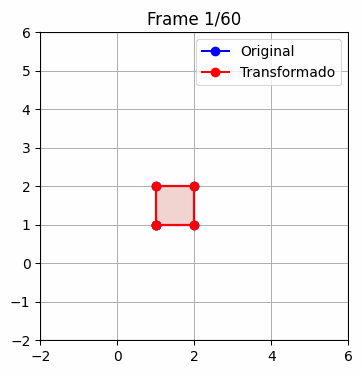

GIF guardado en transformaciones.gif


In [31]:
# Generar animación interpolando escala, rotación y traslación y exportar GIF
import sys, subprocess
try:
    import imageio
except Exception:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'imageio'])
    import imageio

import io
import numpy as np
import matplotlib.pyplot as plt

# Puntos originales (sin repetir el punto final para la transformación)
pts2d = np.array([[1,1],[1,2],[2,2],[2,1]]).T
ones = np.ones((1, pts2d.shape[1]))
pts = np.vstack([pts2d, ones])

def T(tx, ty):
    return np.array([[1, 0, tx],[0, 1, ty],[0, 0, 1]])
def R(deg):
    th = np.deg2rad(deg)
    c, s = np.cos(th), np.sin(th)
    return np.array([[c, -s, 0],[s, c, 0],[0, 0, 1]])
def S(sx, sy):
    return np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1]])

# Parámetros de la animación
num_frames = 60
frames = []

for i in range(num_frames):
    t = i / (num_frames - 1)
    # Interpolaciones ejemplo (puedes ajustar):
    sx = 1.0 + 0.8 * t        # escala x de 1.0 -> 1.8
    sy = 1.0 + 0.8 * t        # escala y de 1.0 -> 1.8
    theta = 360.0 * t         # rotación 0 -> 360 grados
    tx = 0.0 + 2.0 * t        # traslación x 0 -> 2
    ty = 0.0 + 1.0 * t        # traslación y 0 -> 1

    M = T(tx, ty) @ R(theta) @ S(sx, sy)
    pts_t = M @ pts

    # Preparar coordenadas para cierre de polígono
    orig_x = np.append(pts[0,:], pts[0,0])
    orig_y = np.append(pts[1,:], pts[1,0])
    tr_x = np.append(pts_t[0,:], pts_t[0,0])
    tr_y = np.append(pts_t[1,:], pts_t[1,0])

    # Dibujar en matplotlib y guardar en buffer
    fig, ax = plt.subplots(figsize=(4,4))
    ax.plot(orig_x, orig_y, '-o', color='blue', label='Original')
    ax.fill(orig_x, orig_y, color='lightblue', alpha=0.2)
    ax.plot(tr_x, tr_y, '-o', color='red', label='Transformado')
    ax.fill(tr_x, tr_y, color='salmon', alpha=0.3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-2, 6)
    ax.set_ylim(-2, 6)
    ax.grid(True)
    ax.set_title(f'Frame {i+1}/{num_frames}')
    ax.legend(loc='upper right')

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)
    img = imageio.imread(buf)
    frames.append(img)


display(Image(filename=out_path))

# Guardar GIF (ajusta fps según prefieras)
out_path = 'transformaciones.gif'
imageio.mimsave(out_path, frames, fps=20)
print('GIF guardado en', out_path)

# Matriz resultante 

Se muestra solo un par de transformaciones, junto con la matriz compuesta resultante de aplicar todas las transformaciones en secuencia.

In [ ]:
# Mostrar las matrices de transformación para varios valores de t
import numpy as np
np.set_printoptions(precision=3, suppress=True)

def T(tx, ty):
    return np.array([[1, 0, tx],[0, 1, ty],[0, 0, 1]])

def R(deg):
    th = np.deg2rad(deg)
    c, s = np.cos(th), np.sin(th)
    return np.array([[c, -s, 0],[s, c, 0],[0, 0, 1]])

def S(sx, sy):
    return np.array([[sx, 0, 0],[0, sy, 0],[0, 0, 1]])

def interp_params(t):
    # Usar las mismas interpolaciones que en la animación
    sx = 1.0 + 0.8 * t        # escala x 1.0 -> 1.8
    sy = 1.0 + 0.8 * t        # escala y 1.0 -> 1.8
    theta = 360.0 * t         # rotación 0 -> 360
    tx = 0.0 + 2.0 * t        # traslación x 0 -> 2
    ty = 0.0 + 1.0 * t        # traslación y 0 -> 1
    return sx, sy, theta, tx, ty

sample_ts = [0.0, 0.25, 0.5, 0.75, 1.0]
for t in sample_ts:
    sx, sy, theta, tx, ty = interp_params(t)
    M_s = S(sx, sy)
    M_r = R(theta)
    M_t = T(tx, ty)
    M = M_t @ M_r @ M_s
    print(f'----- t = {t:.2f} -----')
    print('M_scale =')
    print(M_s)
    print('M_rot =')
    print(M_r)
    print('M_trans =')
    print(M_t)
    print('M_compuesta =')
    print(M)



# Mostrar la matriz final (t=1) de manera explícita
sx, sy, theta, tx, ty = interp_params(1.0)
print('\nMatriz compuesta final (t=1):')
print((T(tx, ty) @ R(theta) @ S(sx, sy)))

----- t = 0.00 -----
M_scale =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
M_rot =
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
M_trans =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
M_compuesta =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
----- t = 0.25 -----
M_scale =
[[1.2 0.  0. ]
 [0.  1.2 0. ]
 [0.  0.  1. ]]
M_rot =
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
M_trans =
[[1.   0.   0.5 ]
 [0.   1.   0.25]
 [0.   0.   1.  ]]
M_compuesta =
[[ 0.   -1.2   0.5 ]
 [ 1.2   0.    0.25]
 [ 0.    0.    1.  ]]
----- t = 0.50 -----
M_scale =
[[1.4 0.  0. ]
 [0.  1.4 0. ]
 [0.  0.  1. ]]
M_rot =
[[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
M_trans =
[[1.  0.  1. ]
 [0.  1.  0.5]
 [0.  0.  1. ]]
M_compuesta =
[[-1.4 -0.   1. ]
 [ 0.  -1.4  0.5]
 [ 0.   0.   1. ]]
----- t = 0.75 -----
M_scale =
[[1.6 0.  0. ]
 [0.  1.6 0. ]
 [0.  0.  1. ]]
M_rot =
[[-0.  1.  0.]
 [-1. -0.  0.]
 [ 0.  0.  1.]]
M_trans =
[[1.   0.   1.5 ]
 [0.   1.   0.75]
 [0.   0.   1.  ]]
M_compuesta =
[[-0.    1.6   1.5 ]
 [-1.6  -0.    0.75